In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
%matplotlib inline

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

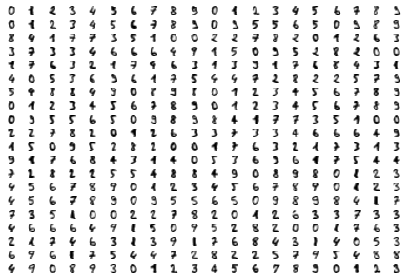

In [3]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [4]:
# digits_df = pd.DataFrame(digits.data[:,1:11])
# digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
# sns.pairplot(digits_df, hue='digit', palette='Spectral')

In [5]:
import umap

In [6]:
reducer = umap.UMAP(random_state=42,verbose=True)
reducer.fit(digits.data)

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Wed Jan 26 21:36:37 2022 Finding Nearest Neighbors
Wed Jan 26 21:36:39 2022 Finished Nearest Neighbor Search
Wed Jan 26 21:36:42 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Jan 26 21:36:46 2022 Finished embedding


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)

In [7]:
redu = pickle.dumps(reducer)
filename = 'digitsreducer.obj'

with open(filename,'wb') as file_object:
    file_object.write(redu)

with open(filename,'rb') as file_object:
    raw_data = file_object.read()

redu2 = pickle.loads(raw_data)

In [8]:
# import pickle as pkl
# file_pi = open('digitsreducer.obj', 'wb') 
# pkl.dump(reducer, file_pi)

In [9]:
# file_pi2 = open('digitsreducer.obj', 'rb') 
# redu = pkl.load(file_pi2)

In [12]:
embedding = redu2.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == redu2.embedding_))
embedding.shape

(1797, 2)

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

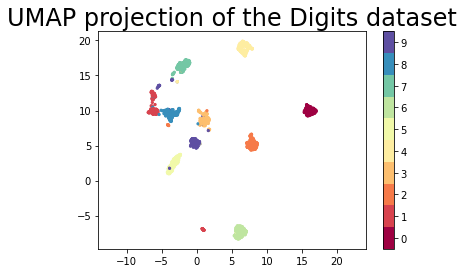

In [14]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
from io import BytesIO
from PIL import Image
import base64

In [ ]:
def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

In [ ]:
[str(9 - x) for x in digits.target_names]

In [ ]:
digits_df = pd.DataFrame(embedding, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digits.target]
digits_df['image'] = list(map(embeddable_image, digits.images))

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in digits.target_names],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

In [ ]:
import numpy as np
from mnist.loader import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='poster')

In [ ]:
mndata = MNIST('fashion-mnist/data/fashion')
train, train_labels = mndata.load_training()
test, test_labels = mndata.load_testing()
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

In [ ]:
import pymde

mnist = pymde.datasets.MNIST()

In [ ]:
mde = pymde.preserve_neighbors(mnist.data, verbose=True)
embedding = mde.embed(verbose=True)

In [ ]:
pymde.plot(embedding, color_by=mnist.attributes['digits'])

In [ ]:
mnist.data[0]

In [ ]:
mnist.attributes